In [16]:
#extract the np arrays from the csv files
import numpy as np
V1 = np.loadtxt('D:/Data/Matlab/VN1_1_0.0003_1.csv',dtype = float)
V2 = np.loadtxt('D:/Data/Matlab/VN2_1_0.0003_1.csv', dtype= float)
t  = np.loadtxt('D:/Data/Matlab/Time_1_0.0003_1.csv', dtype= float)

In [1]:
#extracting from param, method was a bit different
import numpy as np
z = np.loadtxt('C:/Users/suman/Data_0.0_2.csv',dtype = float)
#V2 = np.loadtxt('D:/Data/Matlab/VN2_3_0.0_1.csv', dtype= float)
#t  = np.loadtxt('D:/Data/Matlab/Time_3_0.0_1.csv', dtype= float)
V1 =z[1,:]
V2 =z[2,:]
t =z[0,:]

In [17]:
#the spike train is then windowed into a gaussian curve, where the peak is at each burst and the trough is at the non-spiking region
#the signal convolution prevents any kind of noise generated by the signal at smaller timescales that are not in our roi
y1 = V1
y2 = V2


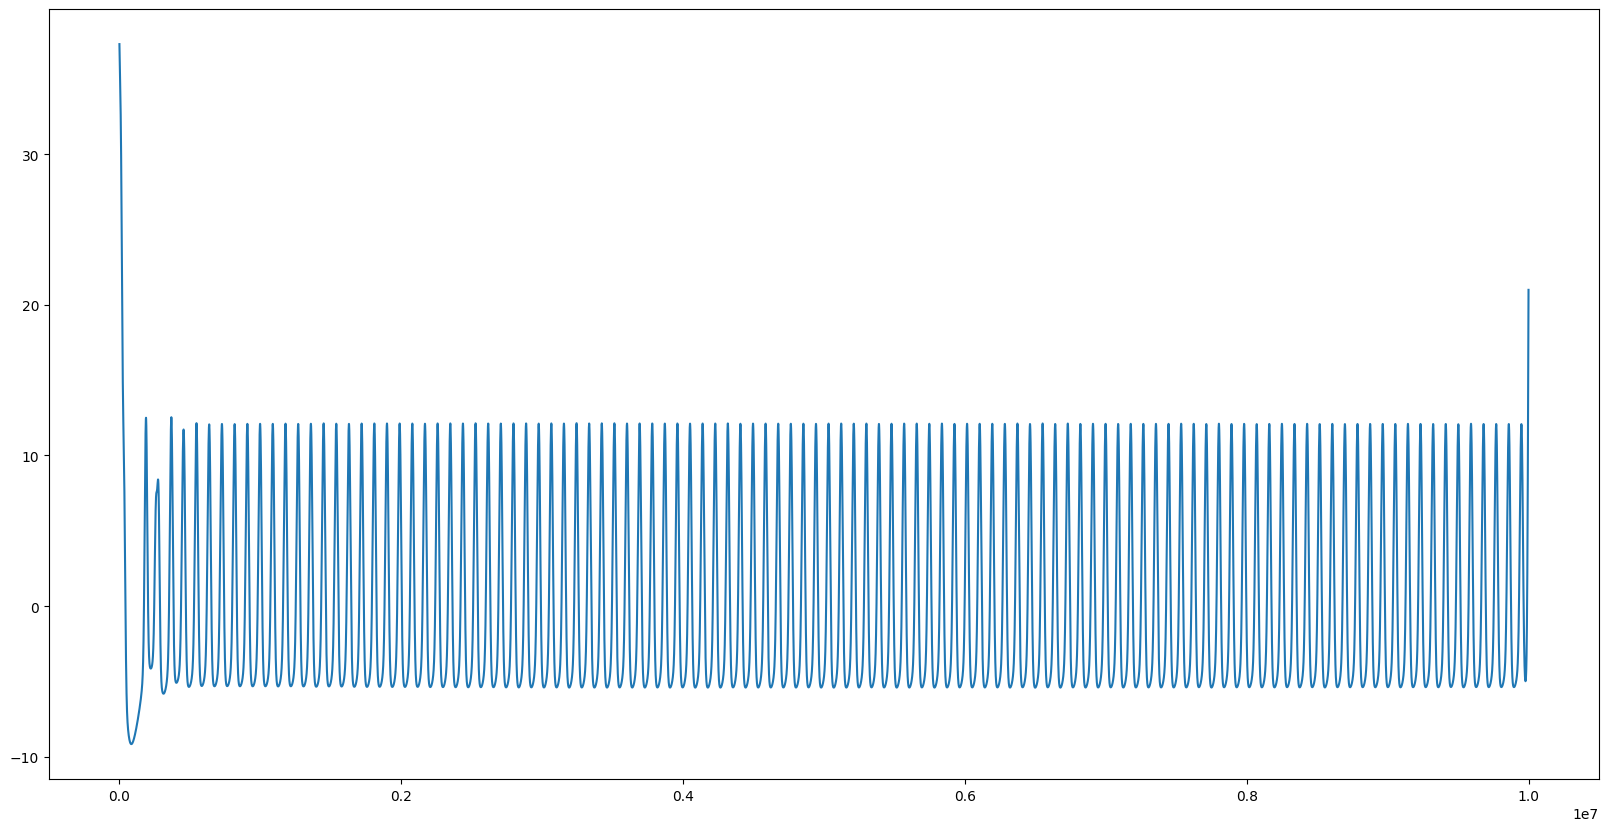

In [18]:
from scipy import signal
win = signal.windows.gaussian(len(y1),8000)
filter = signal.convolve(y1, win, mode='same') / sum(win)
filtered = filter - np.mean(filter)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(filtered)

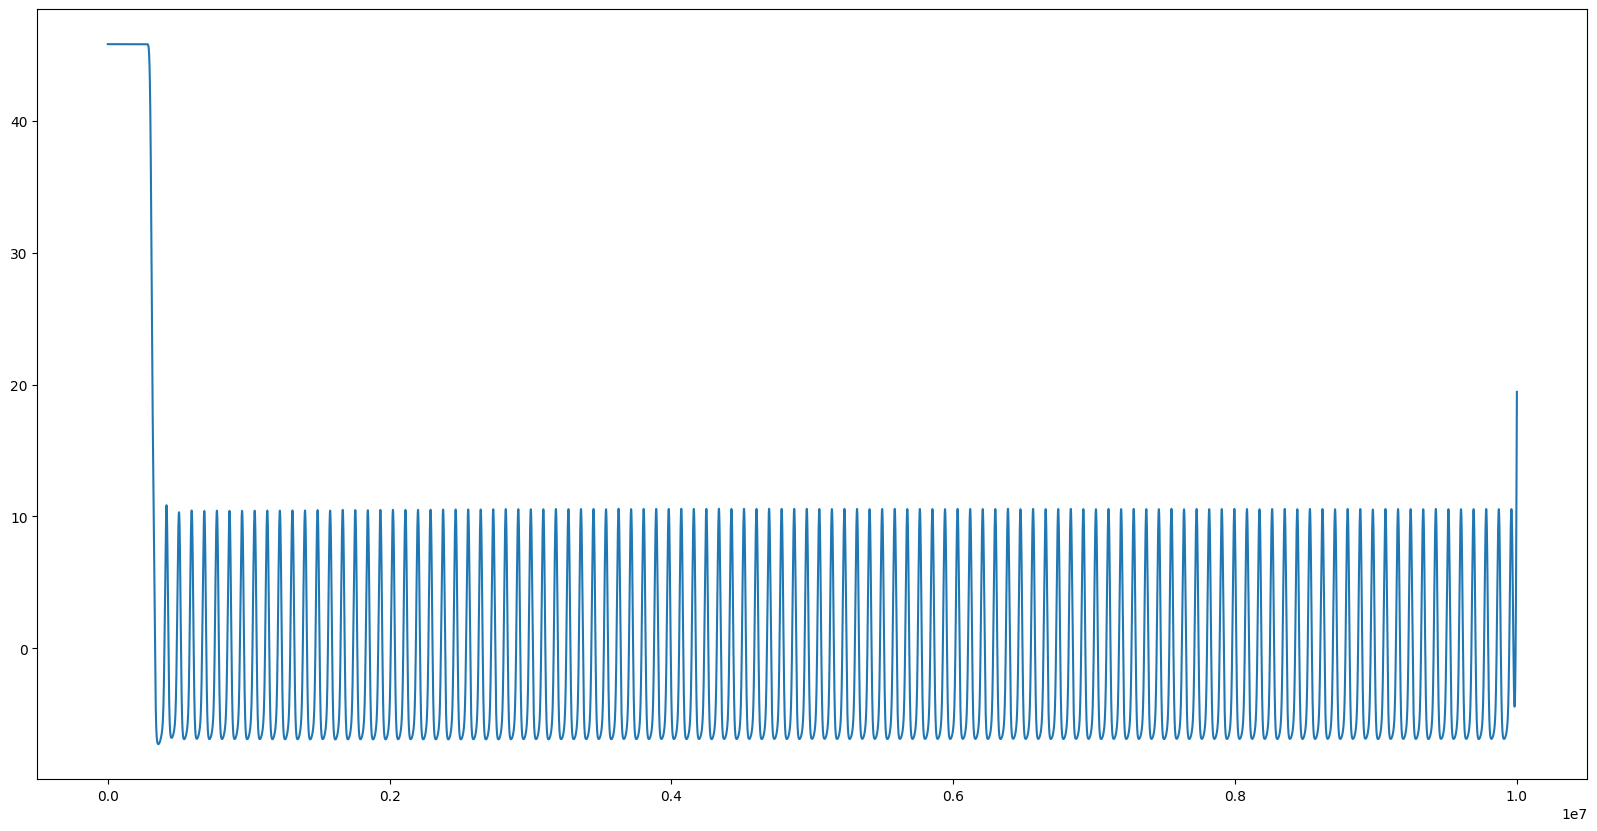

In [19]:
from scipy import signal
win2 = signal.windows.gaussian(len(y2),8000)
filter2 = signal.convolve(y2, win2, mode='same') / sum(win2)
filtered2 = filter2 - np.mean(filter2)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(filtered2)

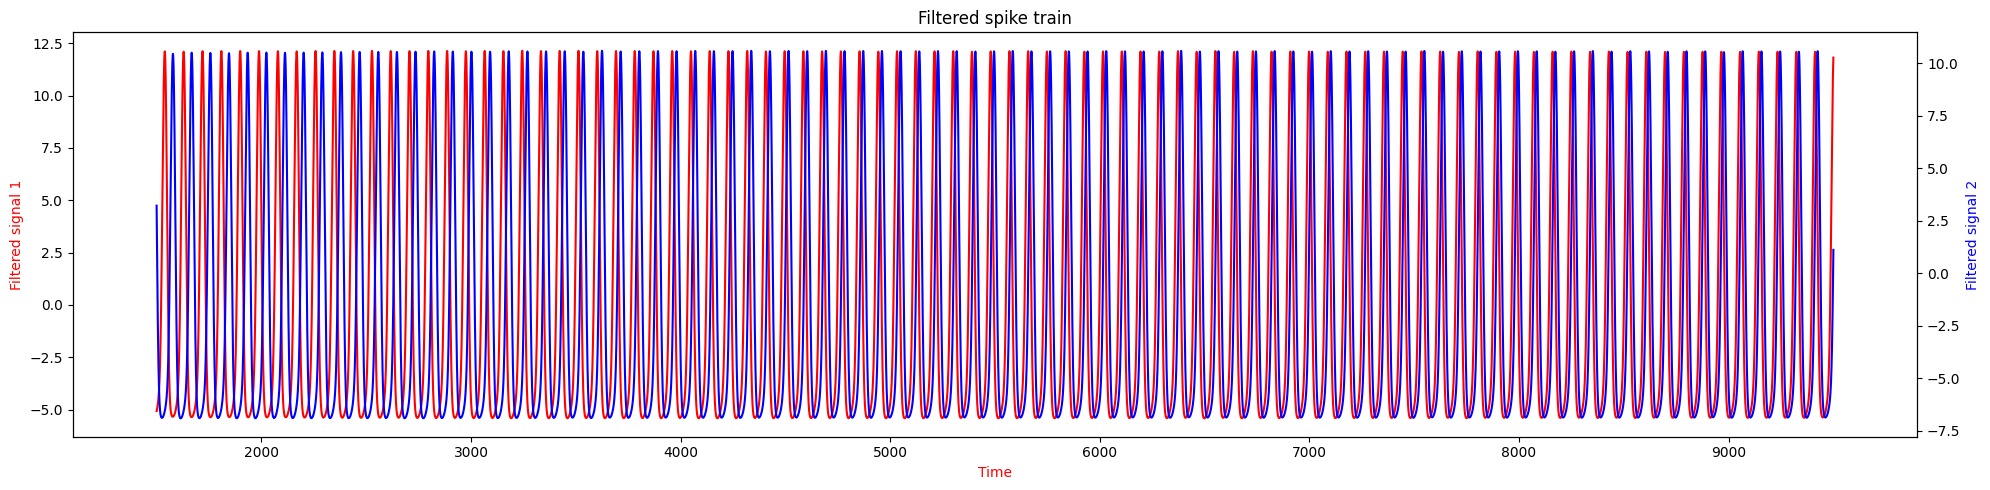

In [20]:
#Remove the initial noisy data of 1.5s after which the steady state behavior is observed 
time = t[1500000:9500000]
# y-axis values
xy1 = filtered[1500000:9500000]
 
# secondary y-axis values
xy2 = filtered2[1500000:9500000]
 
# plotting figures by creating aexs object
# using subplots() function
fig, ax = plt.subplots(figsize = (20, 5))
plt.title('Filtered spike train')
 
# using the twinx() for creating another
# axes object for secondary y-Axis

ax.plot(time, xy1, color = 'r')
ax2 = ax.twinx()
ax2.plot(time, xy2, color = 'b')
 
# giving labels to the axises
ax.set_xlabel('Time', color = 'r')
ax.set_ylabel('Filtered signal 1', color = 'r')
 
# secondary y-axis label
ax2.set_ylabel('Filtered signal 2', color = 'b')
 
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()

In [26]:
#now that we have the difference, we can convert this into their e^ix form
#this can be done in two ways given e^ix=icosx+sinx
from scipy.signal import hilbert
i=0
phase = [[],[]]

phase[0]=np.angle(hilbert(xy1))
phase[1]=np.angle(hilbert(xy2))
z=np.zeros(len(phase[0]), dtype=complex)
while i<len(phase[0]):
    z[i]=complex(0,phase[0][i]-phase[1][i])
    
    i+=1
z

array([0.-0.38125249j, 0.-0.4626696j , 0.-0.46299109j, ...,
       0.+2.64440416j, 0.+2.64401128j, 0.+2.74443834j])

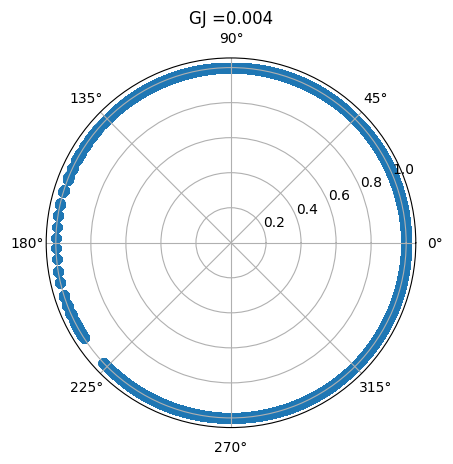

In [22]:
theta = phase[0] - phase[1]
r = np.ones(len(theta))
fig,ax =plt.subplots(subplot_kw = {'projection':'polar'})
ax.scatter(theta,r)
ax.set_title("GJ =0.004")
plt.show()

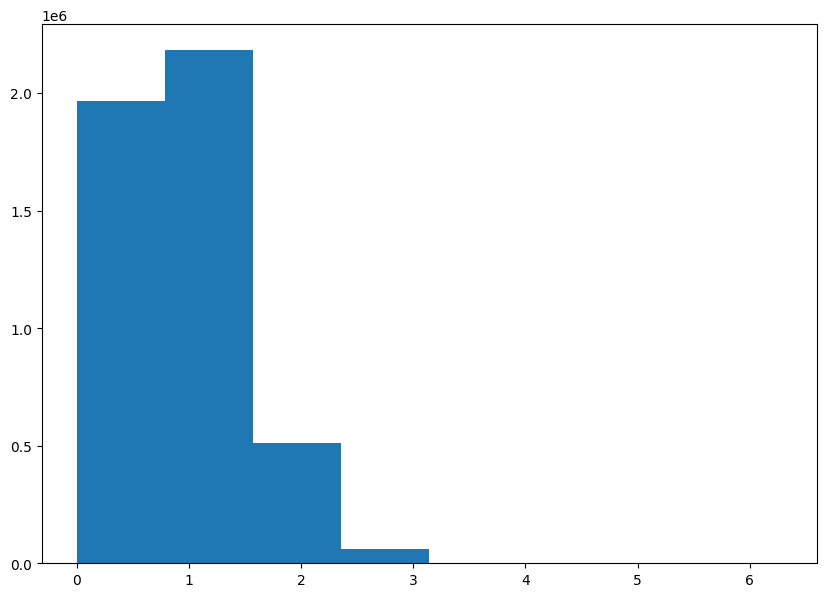

In [23]:
# Creating dataset
a = theta
 
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi])
 
# Show plot
plt.show()

In [27]:
#z is basically the ix of the e^ix
euler = np.exp(z) #gives an e^ix array
sums = sum(euler)
sync = abs(sums/(len(euler)))
real = sum(np.sin(phase[0]-phase[1]))
imag = sum(np.cos(phase[0]-phase[1]))
sync2 = np.sqrt(real**2 + imag**2)/len(euler)
sync, sync2

(0.34024526131012556, 0.3402452613101255)